In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [3]:
tenda_sp_zo = pd.read_csv('tenda_propostas_SP_ZO.csv',sep=';',decimal = ',')

In [4]:
tenda_sp_zo.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [5]:
tenda_sp_zo.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO17080803702346409,173569.3,2982.5,3649.7
1,PRO226208J9T7B6345385,175064.9,2752.0,18420.5
2,PRO227442Z2R9W3345419,166034.6,2068.6,6643.0
3,PRO227505G6D4Y8345559,160050.0,2543.1,12714.5
4,PRO227897T3N7J8345504,161970.7,2394.0,8433.7


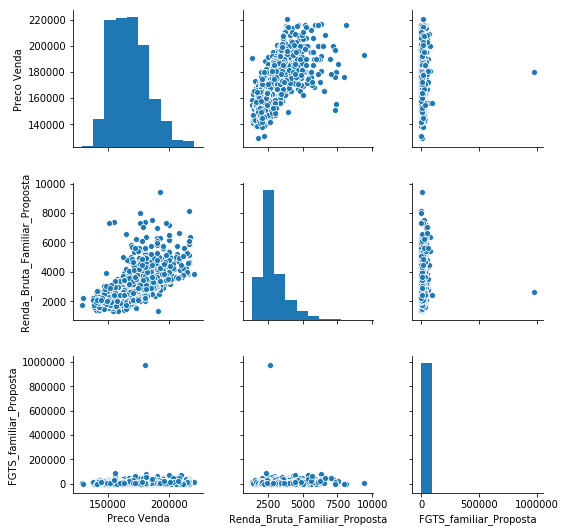

In [6]:
sb.pairplot(tenda_sp_zo)

In [7]:
tenda_drop_sp_zo = tenda_sp_zo.drop(['Chave unica'],axis = 1)
tenda_drop_sp_zo

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,173569.3,2982.5,3649.7
1,175064.9,2752.0,18420.5
2,166034.6,2068.6,6643.0
3,160050.0,2543.1,12714.5
4,161970.7,2394.0,8433.7
5,175064.9,3238.4,8342.6
6,173102.4,1550.4,0.0
7,172377.4,2951.8,17665.5
8,180001.8,3973.7,22831.8
9,180000.0,3497.6,13516.2


K_MEANS (RS)

In [8]:
from sklearn.cluster import KMeans

In [9]:
sb.set_style('darkgrid')

In [10]:
wcss = []

1 1501459990106.5256
2 1216214774641.109
3 297599712043.67456
4 225610878373.99075
5 166198511410.07202
6 141048834271.2947
7 117066836864.25421
8 100862910511.3111
9 90964990754.6658


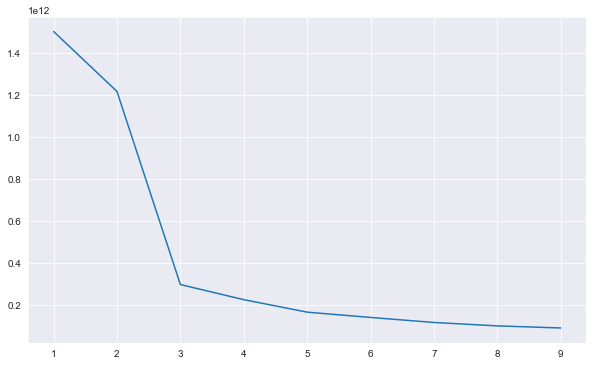

In [11]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_sp_zo)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [30]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [31]:
kmeans.fit(tenda_drop_sp_zo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [32]:
kmeans.labels_

array([0, 0, 2, ..., 2, 2, 2])

CLASSES CRIADAS 

In [33]:
tenda_sp_zo['Kclasses'] = kmeans.labels_

In [34]:
tenda_sp_zo. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO17080803702346409,173569.3,2982.5,3649.7,0
1,PRO226208J9T7B6345385,175064.9,2752.0,18420.5,0
2,PRO227442Z2R9W3345419,166034.6,2068.6,6643.0,2
3,PRO227505G6D4Y8345559,160050.0,2543.1,12714.5,2
4,PRO227897T3N7J8345504,161970.7,2394.0,8433.7,2
5,PRO227906C5T6W0345385,175064.9,3238.4,8342.6,0
6,PRO228044Z2C1B5345483,173102.4,1550.4,0.0,2
7,PRO228703N0L1W0346009,172377.4,2951.8,17665.5,0
8,PRO228738X5P0T7345881,180001.8,3973.7,22831.8,0
9,PRO228929J9D7V1345842,180000.0,3497.6,13516.2,0


In [35]:
tenda_sp_zo['Kclasses'] = kmeans.labels_

In [36]:
tenda_sp_zo.Kclasses.value_counts()

2    1111
0     668
1       1
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [37]:
tenda_sp_zo.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,1780.00,1780.00,1780.00,1780.00
mean,168226.63,2861.59,11035.04,1.25
std,15004.02,957.21,24858.68,0.97
min,129295.90,1325.00,0.00,0.00
25%,156297.67,2262.70,3819.52,0.00
50%,166859.30,2588.25,8358.75,2.00
75%,178239.00,3223.00,14338.50,2.00
max,220064.30,9414.80,973801.00,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

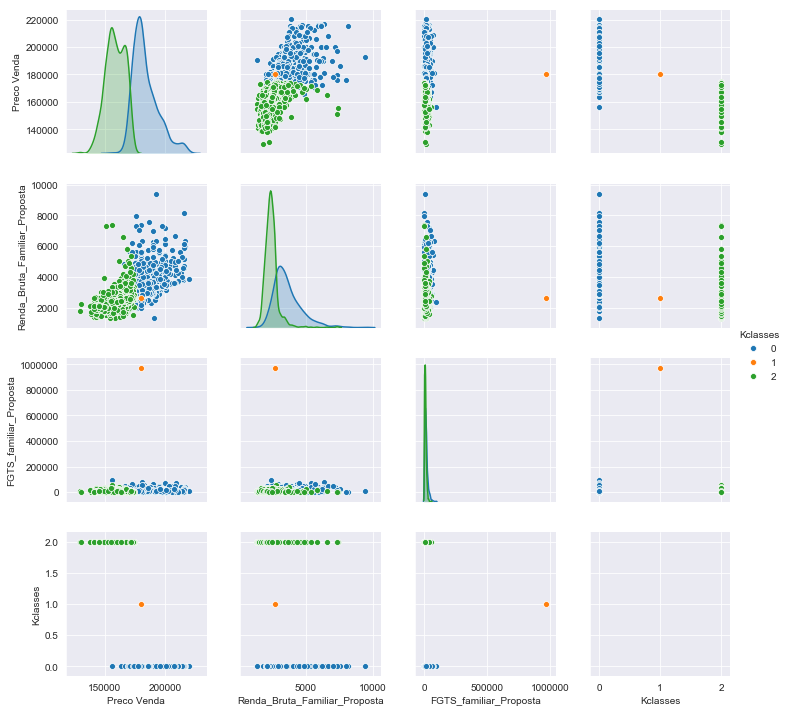

In [38]:
sb.pairplot(tenda_sp_zo,hue='Kclasses')

EXPORTANDO DADOS

In [39]:
tenda_sp_zo.to_csv('clustertenda_SP_ZO.csv',sep=';',decimal=',')